In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [58]:
genres = pd.read_csv('out_40_corrected.csv', encoding ='mac_cyrillic', sep=';')

In [59]:
genres.shape

(324, 25)

In [60]:
genres.coarse_genre.unique()

array(['classic', 'electronic', 'pop', 'hip-hop', 'indie', 'instrumental',
       'jazz', 'metal', 'rock'], dtype=object)

In [61]:
genres.head()

,student,song,coarse_genre,genre1,genre2,genre3,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc,...,chroma_frequencies_3,chroma_frequencies_4,chroma_frequencies_5,chroma_frequencies_6,chroma_frequencies_7,chroma_frequencies_8,chroma_frequencies_9,chroma_frequencies_10,chroma_frequencies_11,chroma_frequencies_12
0,Евдокимова_Анастасия,Passacalia-Hendel,classic,instrumental,NaN,NaN,0.045798,748.314035,1269.271721,-11.941515,...,0.150021,0.153033,0.167364,0.191547,0.205490,0.187953,0.168512,0.154818,0.146623,0.138912
1,Журбенко Петр,Johannes_Passion—Johann_Sebastian_Bach,classic,aria,NaN,NaN,0.076417,1414.632434,2666.842841,-10.983263,...,0.319919,0.327633,0.360628,0.388893,0.381388,0.385996,0.293817,0.420031,0.248379,0.282112
2,Иванова Евгения,Канон_Для_Струнного_Оркестра-Иоганн_Пахельбель,classic,NaN,NaN,NaN,0.085291,1490.988501,2839.114715,-5.051047,...,0.216023,0.297068,0.252765,0.303570,0.315133,0.249486,0.221325,0.201776,0.195795,0.202072
3,Людмила_Проценко,A_Simple_Life-Brian_Crain,classic,neo-classical,new_age_piano,NaN,0.042886,656.653479,1070.636358,-2.400885,...,0.347152,0.267500,0.206898,0.222848,0.253309,0.282360,0.310962,0.263674,0.224395,0.235438
4,Никанорова Даша,Adagio_in_G_Minor-Albinoni,classic,instrumental,NaN,NaN,0.102339,1768.348182,3328.242111,-7.314991,...,0.392298,0.412282,0.485981,0.478761,0.525003,0.381633,0.471162,0.381619,0.338369,0.341242


In [64]:
# encoding the labels
genre_list = genres.coarse_genre
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [65]:
# scaling the feature columns
scaler = StandardScaler()
X = genres.drop(['student', 'song', 'coarse_genre', 'genre1', 'genre2', 'genre3'], axis=1)
X = scaler.fit_transform(np.array(X, dtype = float))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# model = keras.Sequential([

#         # input layer
#         keras.layers.Dense(1024, activation='relu', input_shape=(X.shape[1],)),

#         # 1st dense layer
#         keras.layers.Dense(512, activation='relu'),

#         # 2nd dense layer
#         keras.layers.Dense(256, activation='relu'),

#         # 3rd dense layer
#         keras.layers.Dense(128, activation='relu'),

#         # output layer
#         keras.layers.Dense(27, activation='softmax')
#     ])


model = keras.Sequential([

        # input layer
        keras.layers.Dense(1024, activation='relu', input_shape=(X.shape[1],)),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.4),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.4),

        # 3rd dense layer
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.4),

        
        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])


In [68]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [69]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              20480     
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)              

In [70]:
# train network
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
         epochs=100,
         batch_size=128)

Epoch 1/100
3/3 [==============================] - 3s 508ms/step - loss: 3.5921 - accuracy: 0.0553 - val_loss: 3.4986 - val_accuracy: 0.1538
Epoch 2/100
3/3 [==============================] - 0s 191ms/step - loss: 3.5289 - accuracy: 0.1058 - val_loss: 3.4674 - val_accuracy: 0.1846
Epoch 3/100
3/3 [==============================] - 0s 172ms/step - loss: 3.5038 - accuracy: 0.1155 - val_loss: 3.4419 - val_accuracy: 0.2154
Epoch 4/100
3/3 [==============================] - 0s 116ms/step - loss: 3.4779 - accuracy: 0.1446 - val_loss: 3.4208 - val_accuracy: 0.2308
Epoch 5/100
3/3 [==============================] - 0s 133ms/step - loss: 3.4371 - accuracy: 0.1544 - val_loss: 3.4027 - val_accuracy: 0.2923
Epoch 6/100
3/3 [==============================] - 0s 141ms/step - loss: 3.4195 - accuracy: 0.1971 - val_loss: 3.3856 - val_accuracy: 0.3077
Epoch 7/100
3/3 [==============================] - 0s 122ms/step - loss: 3.3819 - accuracy: 0.2350 - val_loss: 3.3695 - val_accuracy: 0.3077
Epoch 8/100
3

Epoch 59/100
3/3 [==============================] - 0s 212ms/step - loss: 2.8979 - accuracy: 0.3699 - val_loss: 2.9750 - val_accuracy: 0.3231
Epoch 60/100
3/3 [==============================] - 0s 169ms/step - loss: 2.8528 - accuracy: 0.3631 - val_loss: 2.9706 - val_accuracy: 0.3385
Epoch 61/100
3/3 [==============================] - 0s 128ms/step - loss: 2.8395 - accuracy: 0.4020 - val_loss: 2.9661 - val_accuracy: 0.3538
Epoch 62/100
3/3 [==============================] - 0s 124ms/step - loss: 2.8220 - accuracy: 0.4068 - val_loss: 2.9622 - val_accuracy: 0.3538
Epoch 63/100
3/3 [==============================] - 0s 145ms/step - loss: 2.8780 - accuracy: 0.3806 - val_loss: 2.9590 - val_accuracy: 0.3538
Epoch 64/100
3/3 [==============================] - 0s 158ms/step - loss: 2.7858 - accuracy: 0.3787 - val_loss: 2.9567 - val_accuracy: 0.3692
Epoch 65/100
3/3 [==============================] - 0s 203ms/step - loss: 2.8487 - accuracy: 0.3447 - val_loss: 2.9543 - val_accuracy: 0.3385
Epoch 

In [71]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

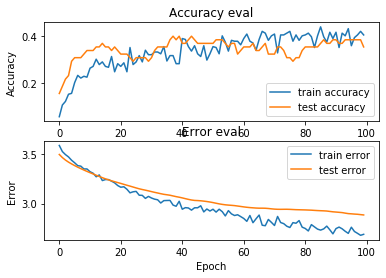

In [72]:
plot_history(history)